**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             r2_score, mean_squared_error, mean_absolute_error)

import joblib
import shap

**1. LOAD & VALIDATE**

In [2]:
path="/content/drive/MyDrive/AI-Job-Risk-Analyzer-2030/AI_Impact_on_Jobs_2030.csv";
df = pd.read_csv(path, encoding='utf-8')

In [3]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [4]:
df.shape

(3000, 18)

In [5]:
df.isna().sum()

,0
Job_Title,0
Average_Salary,0
Years_Experience,0
Education_Level,0
AI_Exposure_Index,0
Tech_Growth_Factor,0
Automation_Probability_2030,0
Risk_Category,0
Skill_1,0
Skill_2,0


In [6]:
df.dtypes

,0
Job_Title,object
Average_Salary,int64
Years_Experience,int64
Education_Level,object
AI_Exposure_Index,float64
Tech_Growth_Factor,float64
Automation_Probability_2030,float64
Risk_Category,object
Skill_1,float64
Skill_2,float64


In [7]:
df.nunique()

,0
Job_Title,20
Average_Salary,2960
Years_Experience,30
Education_Level,4
AI_Exposure_Index,101
Tech_Growth_Factor,101
Automation_Probability_2030,91
Risk_Category,3
Skill_1,101
Skill_2,101


In [8]:
df.describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**2. CLEANING**

In [9]:
df.columns = [c.strip() for c in df.columns]

In [10]:
if df['Automation_Probability_2030'].max() > 1:
    df['Automation_Probability_2030'] = df['Automation_Probability_2030'] / 100.0

In [11]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [12]:
skill_cols = [c for c in df.columns if c.lower().startswith('skill_')]
for c in skill_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [13]:
for c in ['Average_Salary','Years_Experience','AI_Exposure_Index','Tech_Growth_Factor','Automation_Probability_2030']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [14]:
df.isna().sum()

,0
Job_Title,0
Average_Salary,0
Years_Experience,0
Education_Level,0
AI_Exposure_Index,0
Tech_Growth_Factor,0
Automation_Probability_2030,0
Risk_Category,0
Skill_1,0
Skill_2,0


**3. FEATURE SETS (X) and TARGETS (Y)**

In [15]:
features = ['Average_Salary','Years_Experience','Education_Level',
            'AI_Exposure_Index','Tech_Growth_Factor'] + skill_cols


In [16]:
df = df.dropna(subset=['Risk_Category','Automation_Probability_2030'])

In [19]:
X = df[features].copy()
y_clf = df['Risk_Category'].copy()
y_reg = df['Automation_Probability_2030'].copy()

In [20]:
X.shape

(3000, 15)

**4. PREPROCESSING PIPELINE**

In [21]:
num_feats = ['Average_Salary','Years_Experience','AI_Exposure_Index','Tech_Growth_Factor'] + skill_cols
cat_feats = ['Education_Level']

In [22]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [24]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [28]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_feats),
    ('cat', categorical_transformer, cat_feats)
], remainder='drop')


**5. TRAIN / TEST SPLIT**

In [29]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

In [30]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42)

In [31]:
models_clf = {
    'logistic': Pipeline([('pre', preprocessor),
                          ('clf', LogisticRegression(max_iter=200, random_state=42))]),
    'ridge_clf': Pipeline([('pre', preprocessor),
                           ('clf', RidgeClassifier())]),
    'tree': Pipeline([('pre', preprocessor),
                      ('clf', DecisionTreeClassifier(max_depth=6, random_state=42))])
}


--- logistic ---
Accuracy: 0.5066666666666667
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       148
         Low       0.00      0.00      0.00       148
      Medium       0.51      1.00      0.67       304

    accuracy                           0.51       600
   macro avg       0.17      0.33      0.22       600
weighted avg       0.26      0.51      0.34       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


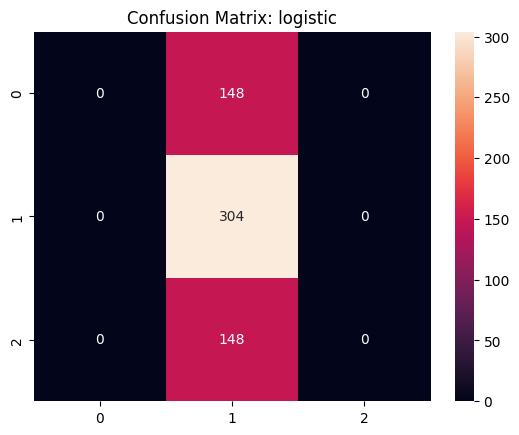


--- ridge_clf ---
Accuracy: 0.5066666666666667
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       148
         Low       0.00      0.00      0.00       148
      Medium       0.51      1.00      0.67       304

    accuracy                           0.51       600
   macro avg       0.17      0.33      0.22       600
weighted avg       0.26      0.51      0.34       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


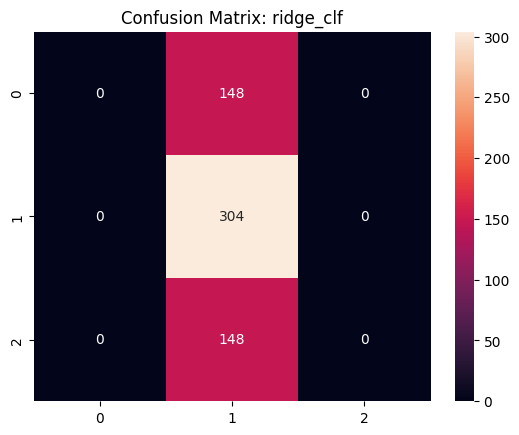


--- tree ---
Accuracy: 0.475
              precision    recall  f1-score   support

        High       0.19      0.03      0.06       148
         Low       0.12      0.01      0.02       148
      Medium       0.50      0.91      0.65       304

    accuracy                           0.47       600
   macro avg       0.27      0.32      0.24       600
weighted avg       0.33      0.47      0.35       600



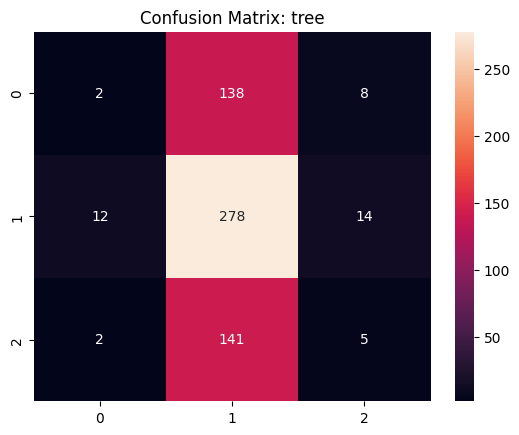

In [32]:
for name, pipe in models_clf.items():
    pipe.fit(X_train_clf, y_train_clf)
    preds = pipe.predict(X_test_clf)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test_clf, preds))
    print(classification_report(y_test_clf, preds))
    cm = confusion_matrix(y_test_clf, preds, labels=['Low','Medium','High'])
    sns.heatmap(cm, annot=True, fmt='d'); plt.title(f"Confusion Matrix: {name}"); plt.show()

**7. REGRESSION MODELS**

In [33]:
models_reg = {
    'linear': Pipeline([('pre', preprocessor),
                        ('reg', LinearRegression())]),
    'ridge': Pipeline([('pre', preprocessor),
                       ('reg', Ridge(alpha=1.0))]),
    'tree_reg': Pipeline([('pre', preprocessor),
                          ('reg', DecisionTreeRegressor(max_depth=8, random_state=42))])
}

In [34]:
for name, pipe in models_reg.items():
    pipe.fit(X_train_reg, y_train_reg)
    preds = pipe.predict(X_test_reg)
    print(f"\n--- {name} ---")
    print("R2:", r2_score(y_test_reg, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, preds)))
    print("MAE:", mean_absolute_error(y_test_reg, preds))


--- linear ---
R2: -0.006449156728536298
RMSE: 0.25347868845238003
MAE: 0.21697504079890204

--- ridge ---
R2: -0.006443441010391071
RMSE: 0.2534779686868627
MAE: 0.2169742694597068

--- tree_reg ---
R2: -0.21800750292251836
RMSE: 0.27884991275996013
MAE: 0.23460412014187929


In [35]:
pre = preprocessor.fit(X)

In [36]:
num_names = num_feats
cat_ohe = pre.named_transformers_['cat'].named_steps['ohe']
cat_names = list(cat_ohe.get_feature_names_out(cat_feats))
feature_names = list(num_names) + cat_names

In [37]:
tree_reg = models_reg['tree_reg'].named_steps['reg']

,feature,importance
5,Skill_2,0.124910
0,Average_Salary,0.105353
7,Skill_4,0.103636
4,Skill_1,0.089182
6,Skill_3,0.088573
13,Skill_10,0.086129
12,Skill_9,0.076963
9,Skill_6,0.076703
2,AI_Exposure_Index,0.056056
1,Years_Experience,0.052698


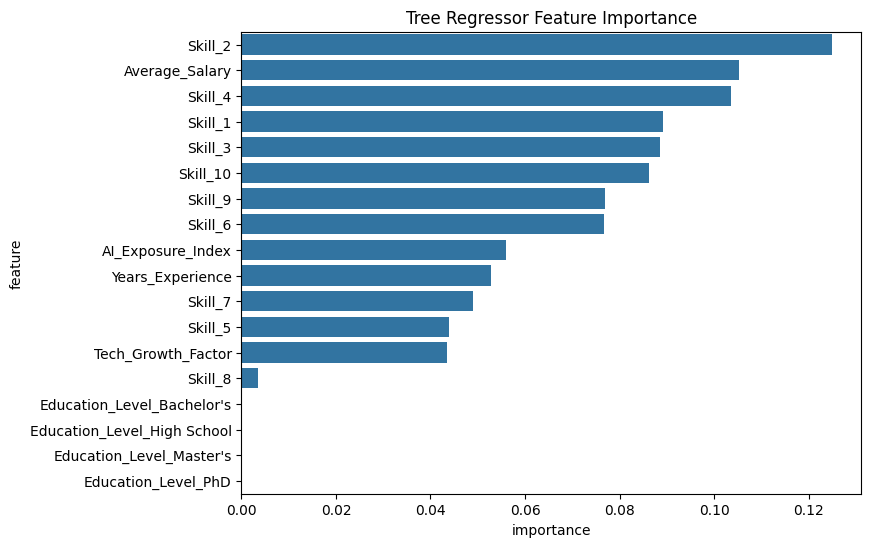

In [38]:

    importances = tree_reg.feature_importances_
    feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(20)
    display(feat_imp)
    plt.figure(figsize=(8,6)); sns.barplot(x='importance', y='feature', data=feat_imp); plt.title('Tree Regressor Feature Importance'); plt.show()


In [40]:
tree_clf = models_clf['tree'].named_steps['clf']

In [41]:
importances_c = tree_clf.feature_importances_
    feat_imp_c = pd.DataFrame({'feature': feature_names, 'importance': importances_c}).sort_values('importance', ascending=False).head(20)
    display(feat_imp_c)
    plt.figure(figsize=(8,6)); sns.barplot(x='importance', y='feature', data=feat_imp_c); plt.title('Tree Classifier Feature Importance'); plt.show()

IndentationError: unexpected indent (ipython-input-706378808.py, line 2)

**9. SHAP**

In [42]:
X_pre_full = pre.transform(X)

In [43]:
background = X_pre_full[np.random.choice(X_pre_full.shape[0], size=200, replace=False)]

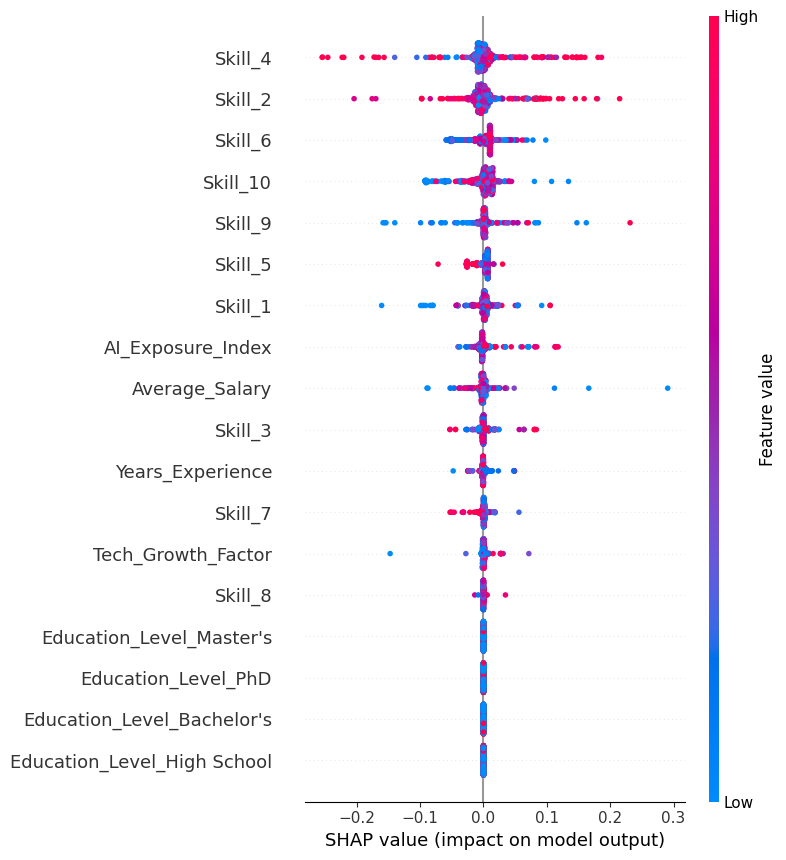

In [44]:
explainer_reg = shap.Explainer(tree_reg, feature_names=feature_names)
shap_values_reg = explainer_reg(pre.transform(X_test_reg))
shap.summary_plot(shap_values_reg, features=pre.transform(X_test_reg), feature_names=feature_names, show=True)

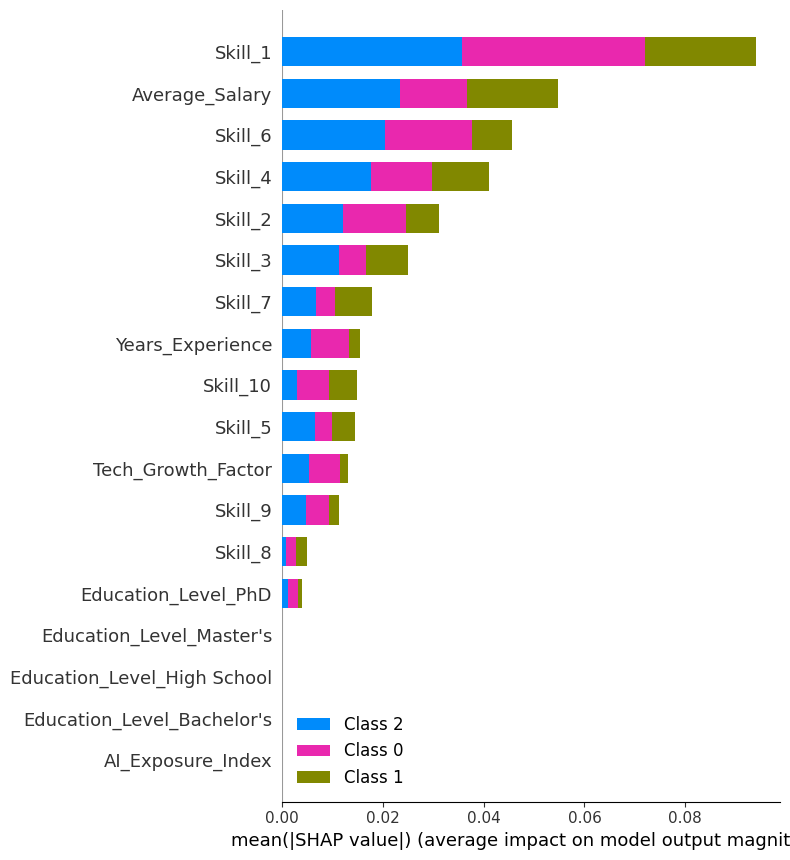

In [45]:
explainer_clf = shap.Explainer(tree_clf, feature_names=feature_names)
shap_values_clf = explainer_clf(pre.transform(X_test_clf))
shap.summary_plot(shap_values_clf, features=pre.transform(X_test_clf), feature_names=feature_names, show=True)


**save model**

In [46]:
# joblib.dump(models_clf['tree'], 'best_risk_tree_pipeline.joblib')
# joblib.dump(models_reg['tree_reg'], 'best_autoprob_tree_pipeline.joblib')